In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/datafile2.csv')

In [ ]:
df

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8
5,Maize,198.8,249.6,259.8,220.1,286.0,156.1,160.5,161.6,163.4,169.1,127.3,155.5,160.7,134.7,169.1
6,Ragi,56.1,83.6,79.3,73.4,85.2,60.2,70.9,70.6,64.8,65.8,93.2,117.9,112.2,113.2,129.6
7,Small millets,53.9,61.9,50.0,42.9,82.0,50.9,52.3,45.6,41.8,45.0,106.0,118.3,109.7,102.7,182.4
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
9,Coarse Cereals,138.5,166.4,163.5,137.0,178.4,106.4,105.6,101.8,102.6,105.4,130.1,157.6,160.7,133.5,169.2


In [ ]:
df.head()

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                55 non-null     object 
 1   Production 2006-07  55 non-null     float64
 2   Production 2007-08  55 non-null     float64
 3   Production 2008-09  55 non-null     float64
 4   Production 2009-10  55 non-null     float64
 5   Production 2010-11  55 non-null     float64
 6   Area 2006-07        55 non-null     float64
 7   Area 2007-08        55 non-null     float64
 8   Area 2008-09        55 non-null     float64
 9   Area 2009-10        55 non-null     float64
 10  Area 2010-11        55 non-null     float64
 11  Yield 2006-07       55 non-null     float64
 12  Yield 2007-08       55 non-null     float64
 13  Yield 2008-09       55 non-null     float64
 14  Yield 2009-10       55 non-null     float64
 15  Yield 2010-11       55 non-null     float64
dtypes: float64

In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

In [ ]:
df.head()

,Crop,Production_2006_07,Production_2007_08,Production_2008_09,Production_2009_10,Production_2010_11,Area_2006_07,Area_2007_08,Area_2008_09,Area_2009_10,Area_2010_11,Yield_2006_07,Yield_2007_08,Yield_2008_09,Yield_2009_10,Yield_2010_11
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8


In [ ]:
df.isnull().sum()

,0
Crop,0
Production_2006_07,0
Production_2007_08,0
Production_2008_09,0
Production_2009_10,0
Production_2010_11,0
Area_2006_07,0
Area_2007_08,0
Area_2008_09,0
Area_2009_10,0


In [ ]:
production_columns = [col for col in df.columns if 'Production' in col]
df['Total_Production'] = df[production_columns].sum(axis=1)
df.head()

,Crop,Production_2006_07,Production_2007_08,Production_2008_09,Production_2009_10,Production_2010_11,Area_2006_07,Area_2007_08,Area_2008_09,Area_2009_10,Area_2010_11,Yield_2006_07,Yield_2007_08,Yield_2008_09,Yield_2009_10,Yield_2010_11,Total_Production
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9,2511.0
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2,3060.0
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3,2097.6
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8,1879.2
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8,2145.3


In [ ]:
highest_production_crop = df.loc[df['Total_Production'].idxmax()]
print("Crop with highest production:", highest_production_crop['Crop'])
print("Total Production:", highest_production_crop['Total_Production'])

Crop with highest production: Total Spices
Total Production: 23049.300000000003


In [ ]:
yield_columns = [col for col in df.columns if 'Yield' in col]
df['Average_Yield'] = df[yield_columns].mean(axis=1)
df.head()

,Crop,Production_2006_07,Production_2007_08,Production_2008_09,Production_2009_10,Production_2010_11,Area_2006_07,Area_2007_08,Area_2008_09,Area_2009_10,Area_2010_11,Yield_2006_07,Yield_2007_08,Yield_2008_09,Yield_2009_10,Yield_2010_11,Total_Production,Average_Yield
0,Total Foodgrains,158.8,168.6,171.3,159.4,178.9,128.5,128.8,127.6,126.0,131.7,123.6,130.9,134.3,126.5,135.9,2511.0,130.24
1,Rice,200.8,207.9,213.3,191.6,206.4,168.5,168.9,175.1,161.2,164.8,119.2,123.1,121.8,118.9,125.2,3060.0,121.64
2,Wheat,131.6,136.4,140.1,140.3,150.8,115.0,115.2,114.0,116.9,119.5,114.4,118.4,122.8,120.0,126.3,2097.6,120.38
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8,1879.2,113.16
4,Bajra,136.4,161.5,143.9,105.4,167.9,94.5,95.1,87.0,88.5,95.6,144.3,169.7,165.4,119.0,175.8,2145.3,154.84


In [ ]:
highest_yield_crop = df.loc[df['Average_Yield'].idxmax()]
print("Crop with highest yield:", highest_yield_crop['Crop'])
print("Average Yield:", highest_yield_crop['Average_Yield'])

Crop with highest yield: Total Spices
Average Yield: 1212.8000000000002


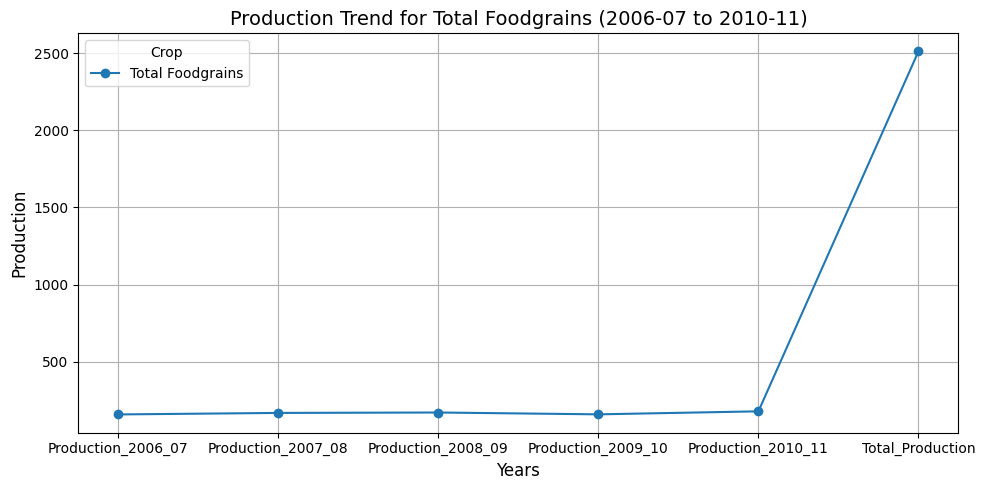

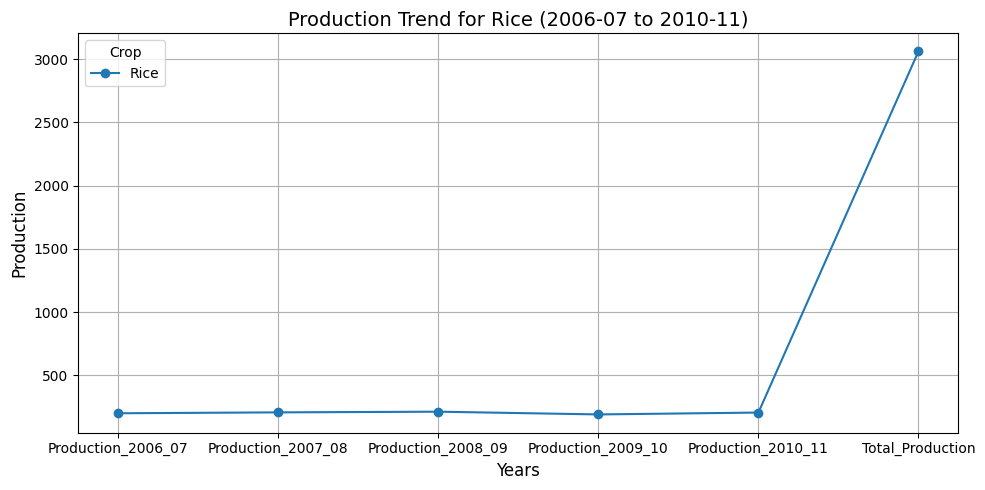

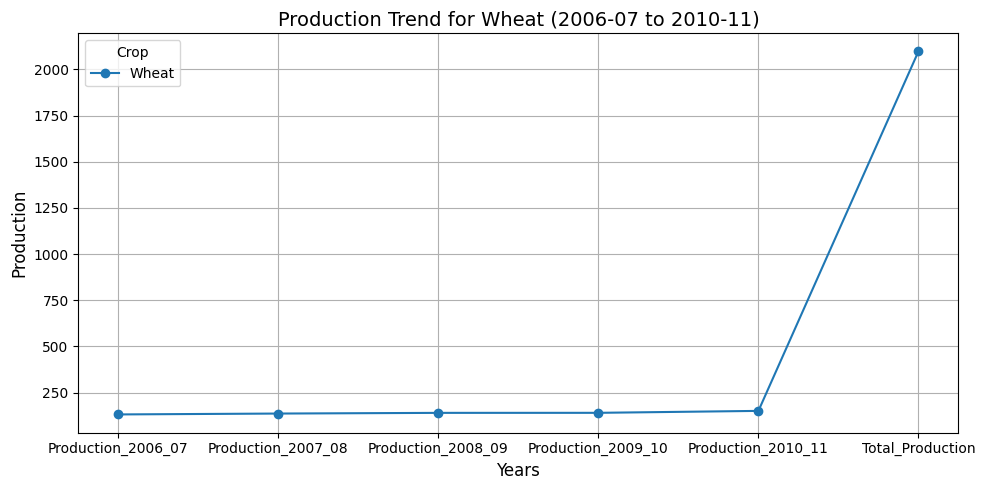

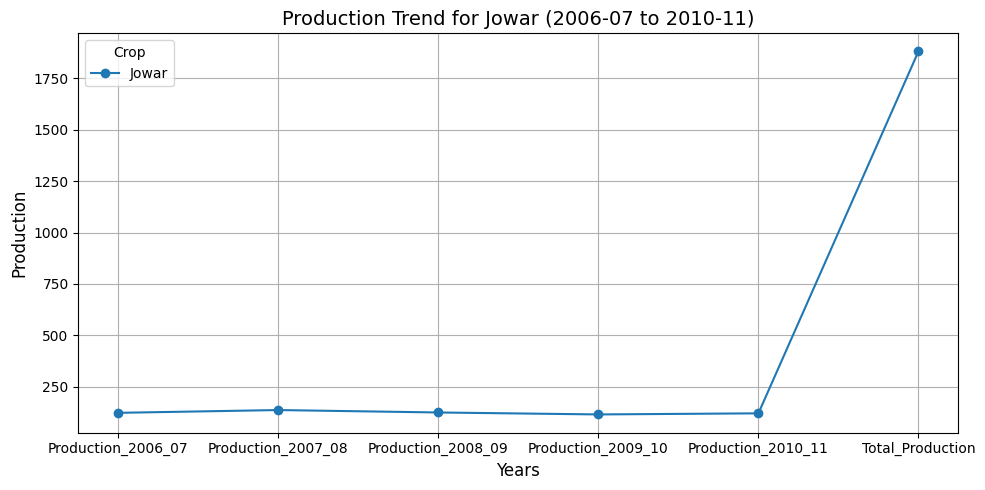

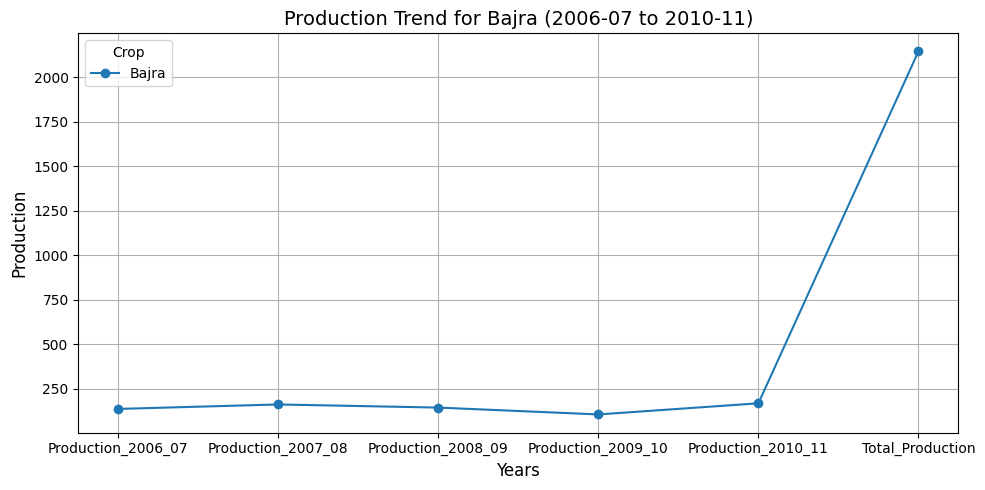

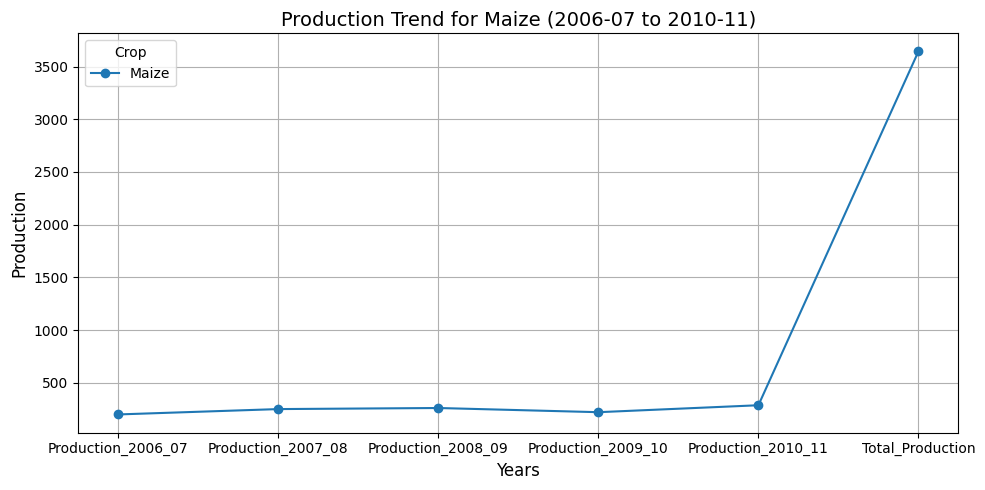

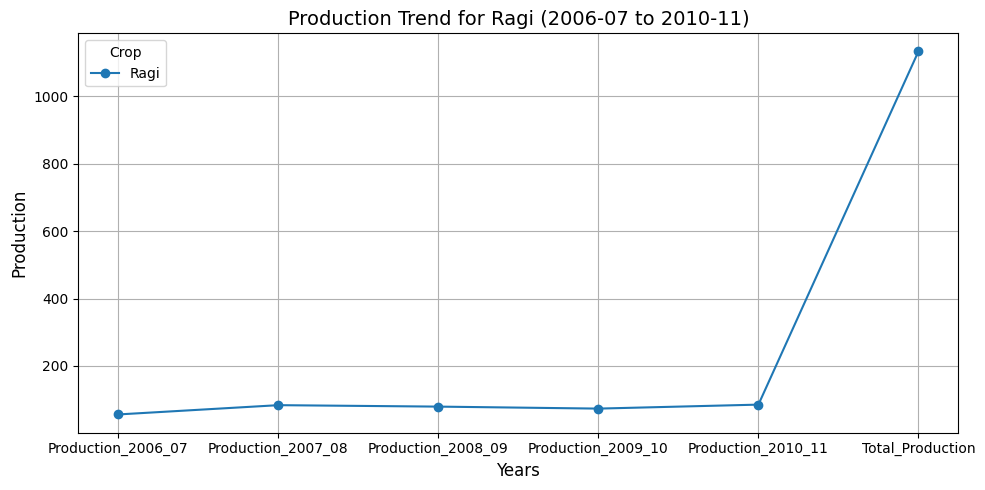

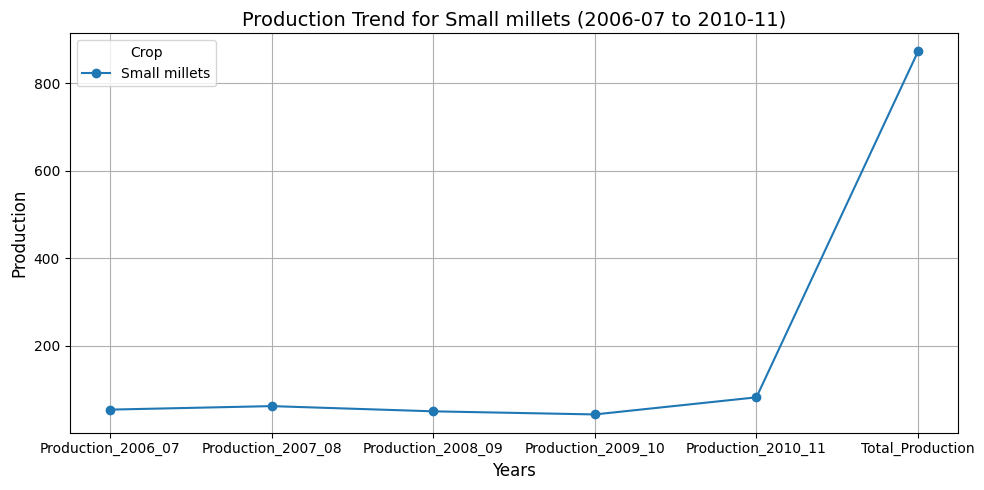

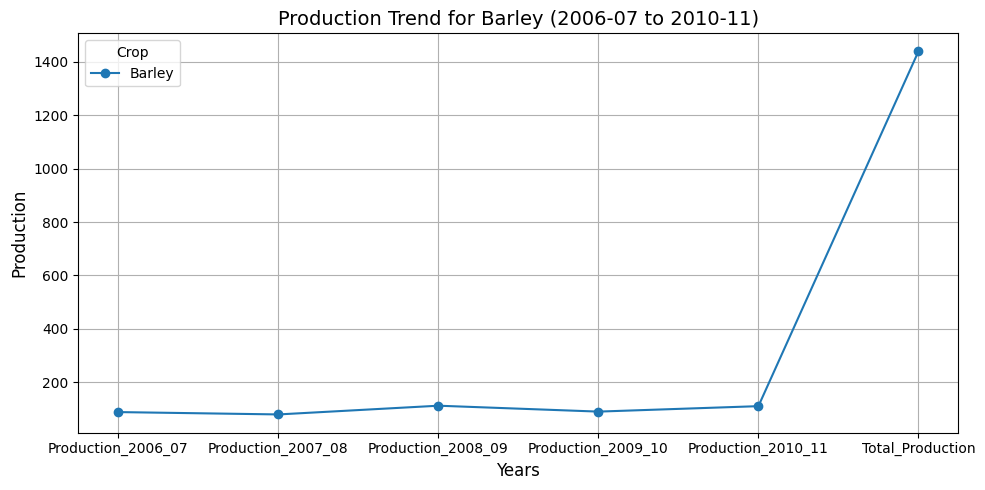

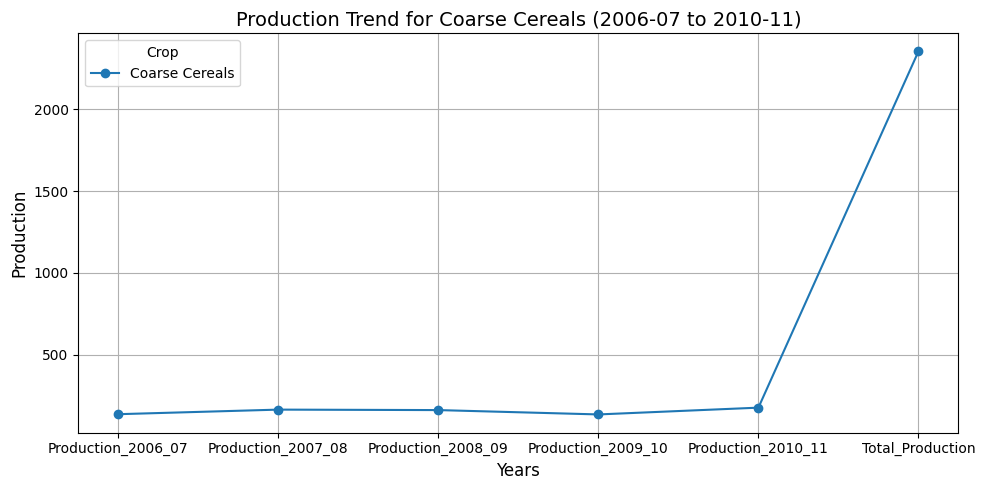

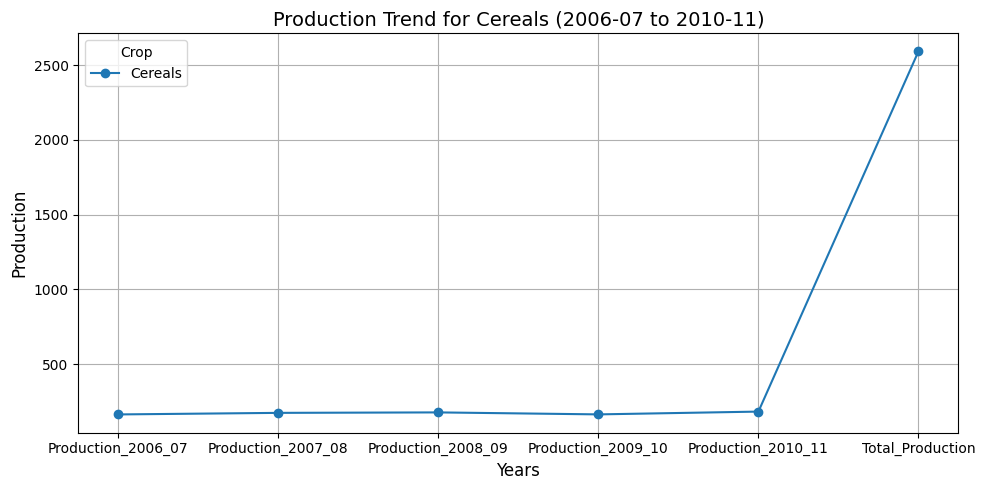

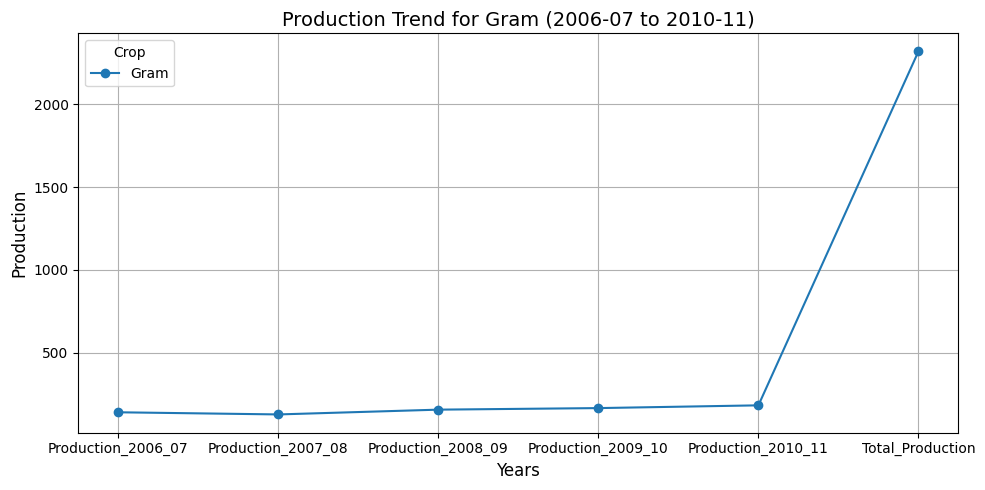

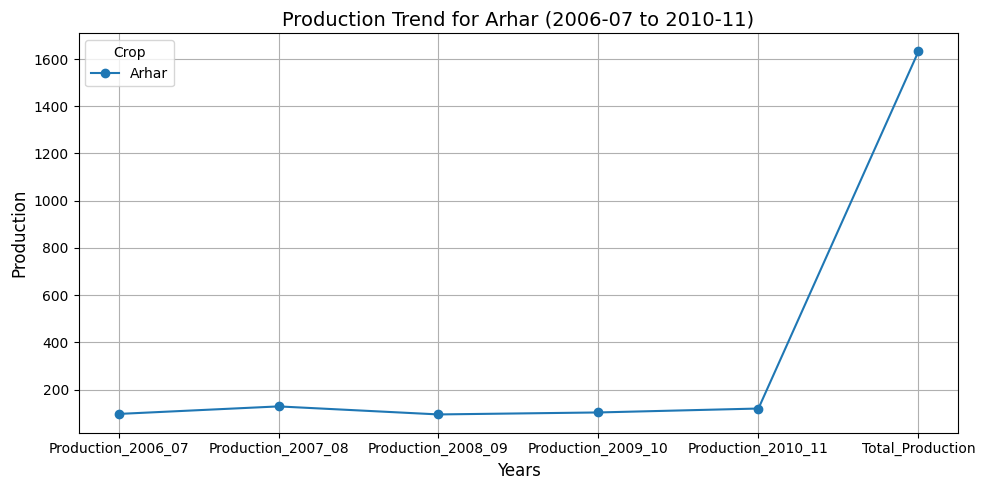

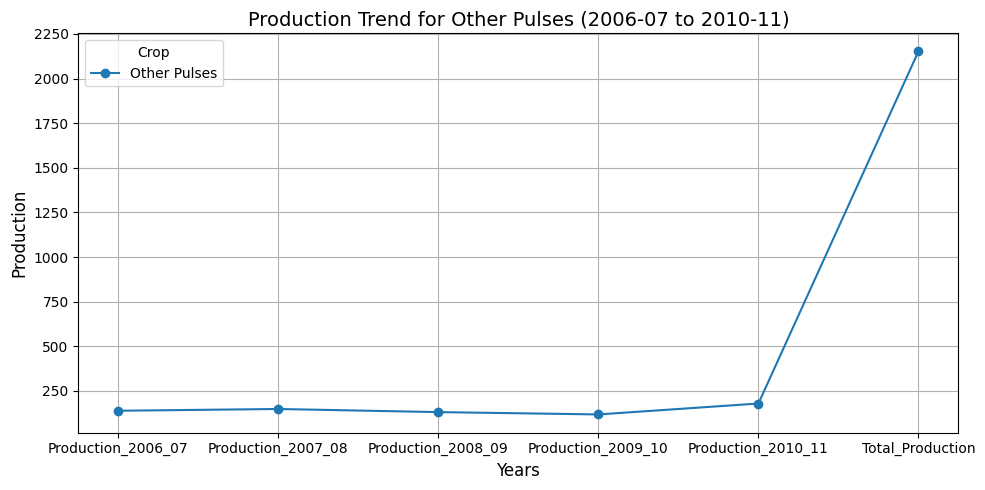

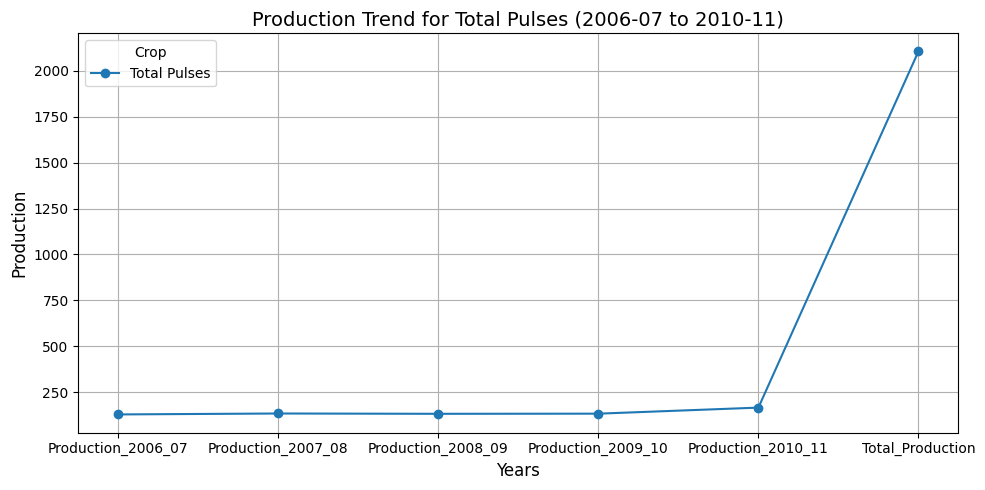

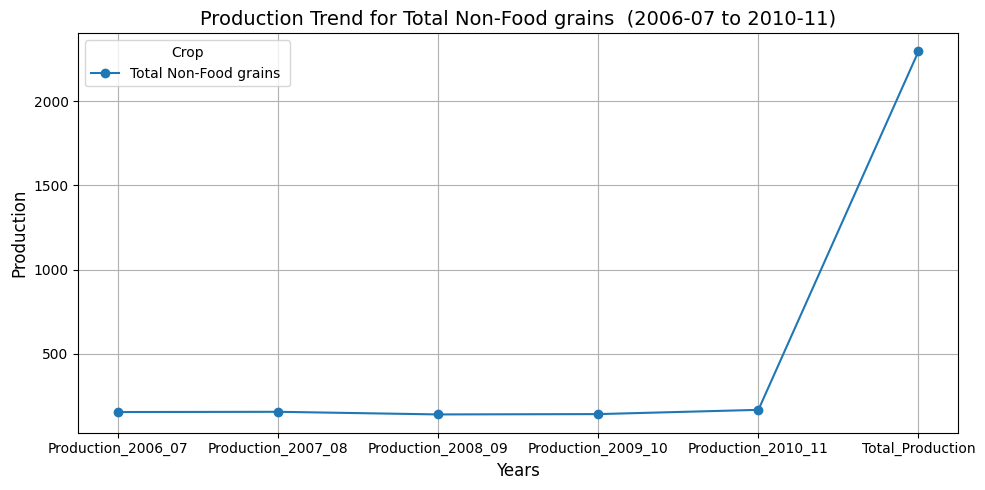

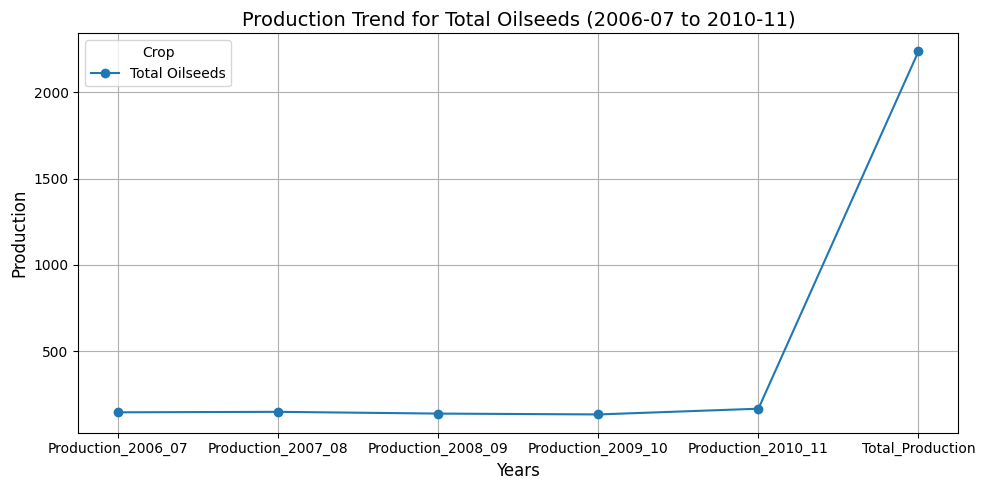

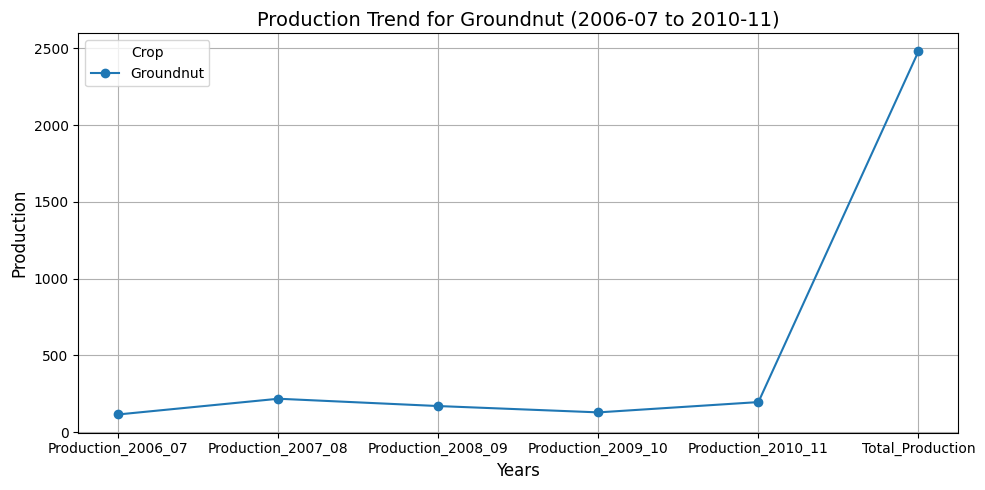

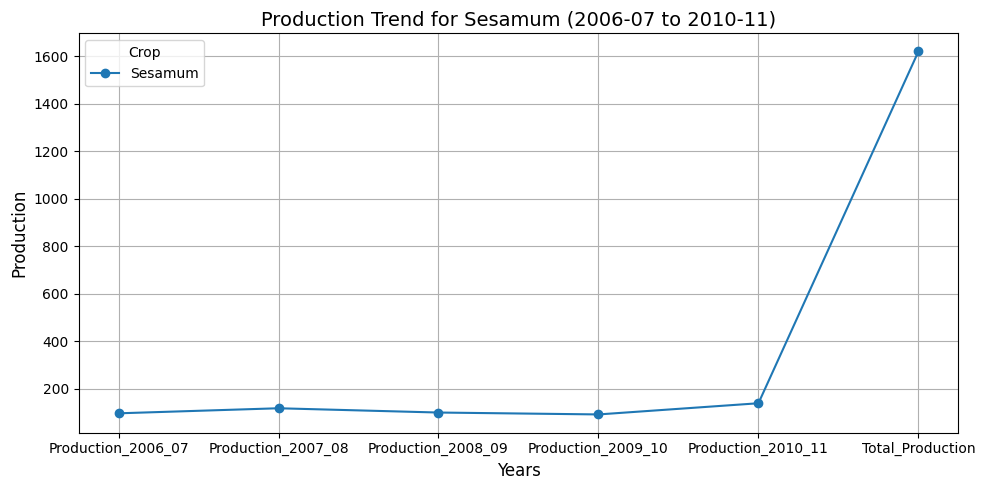

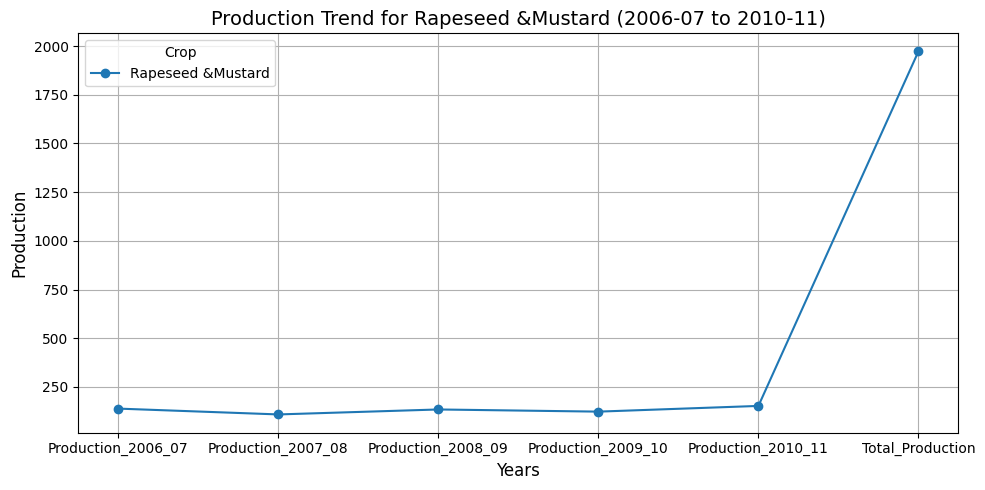

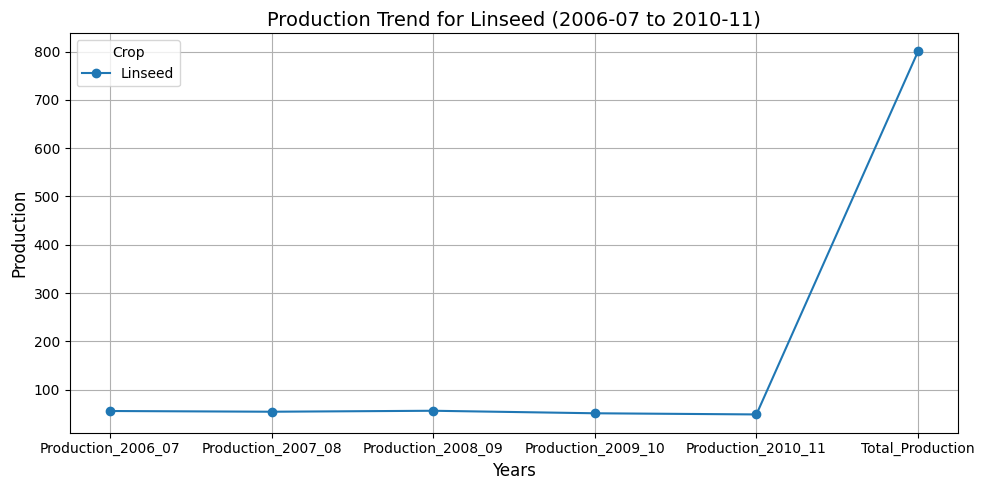

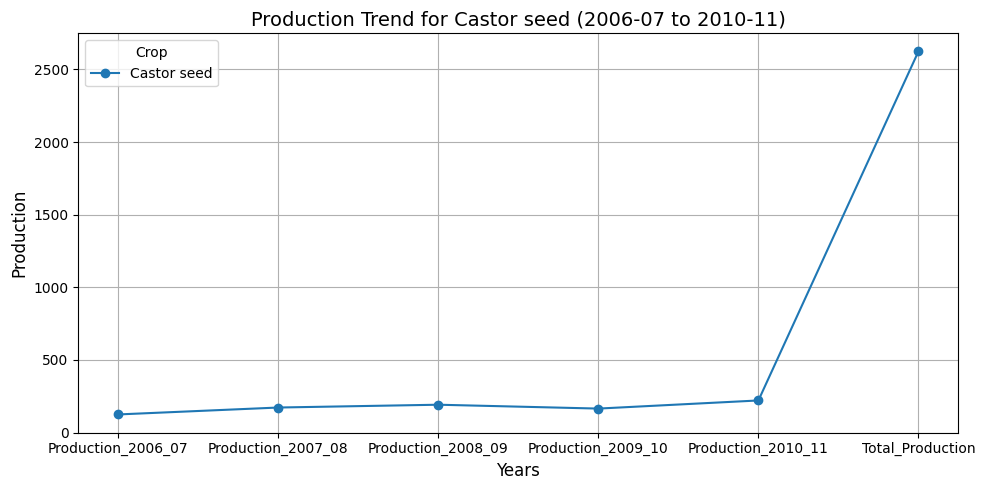

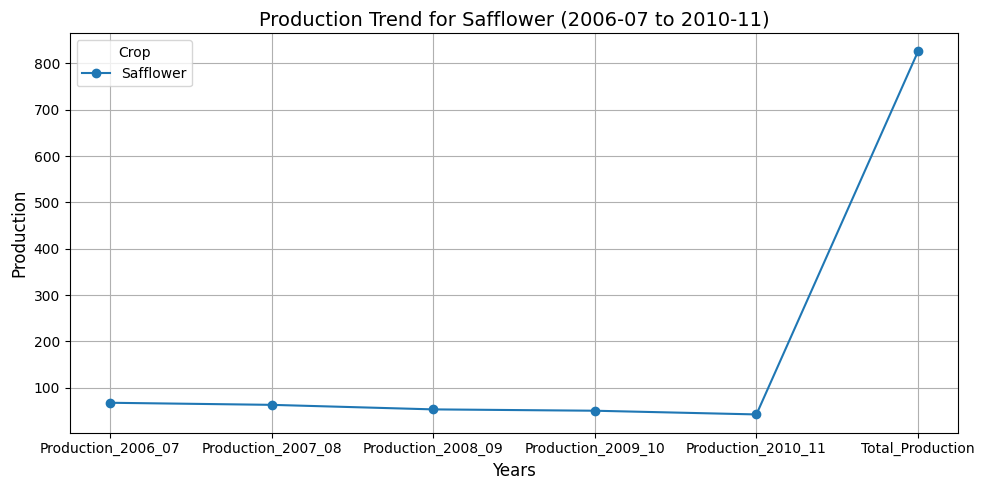

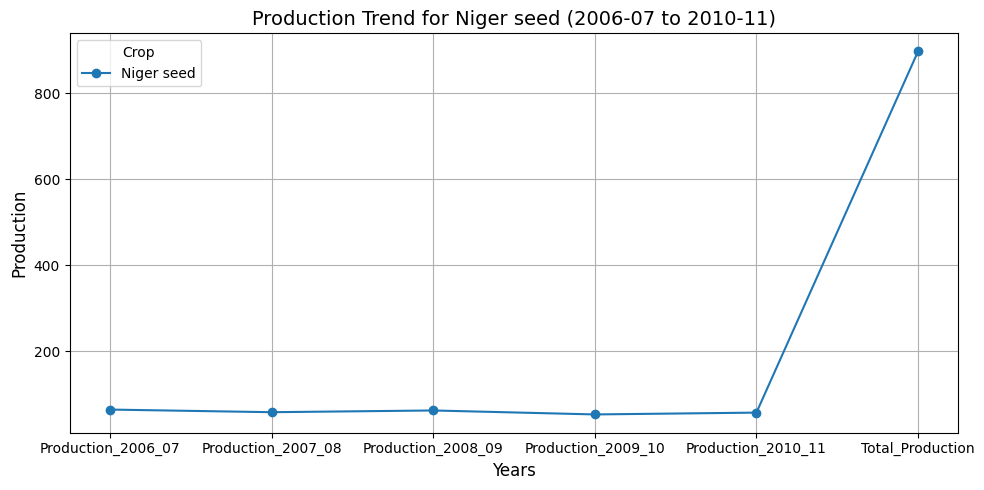

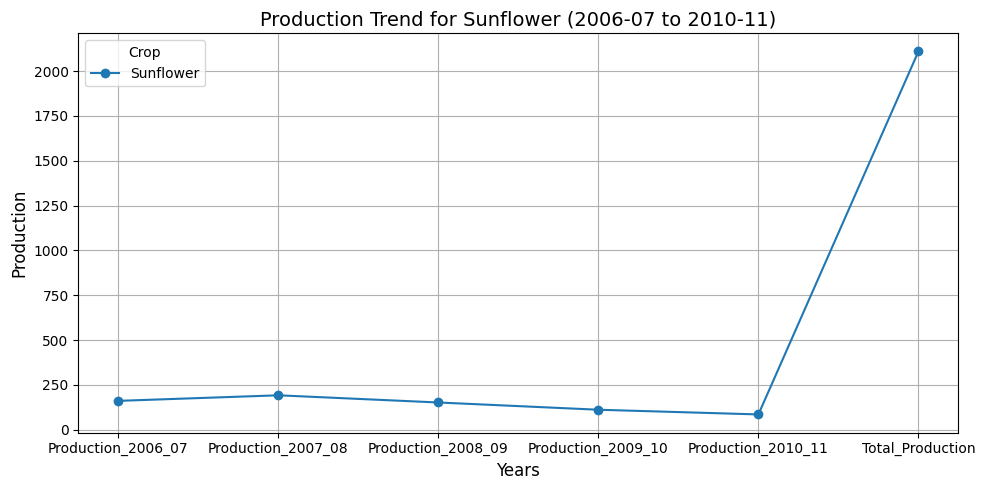

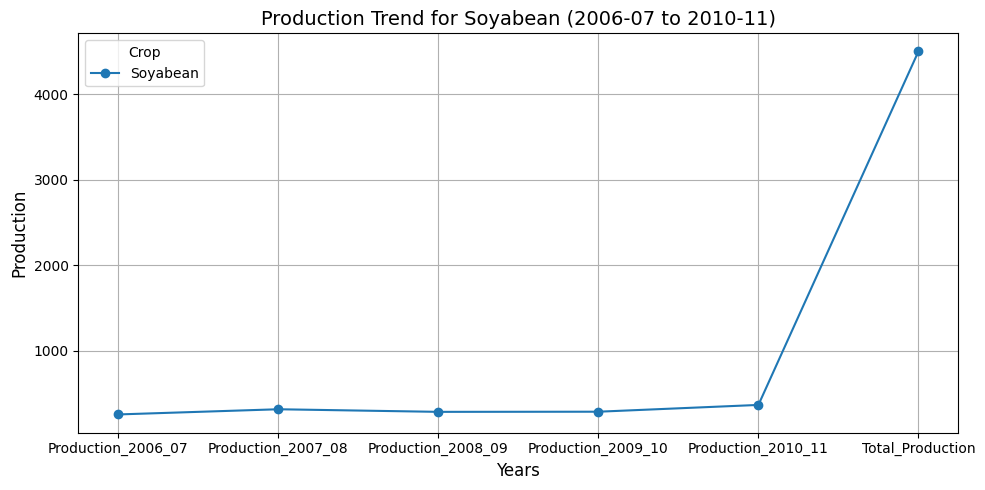

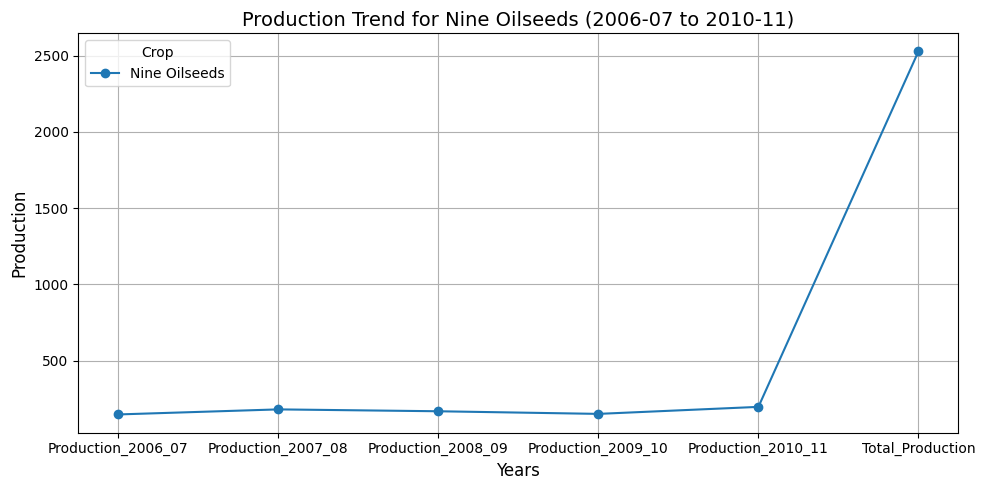

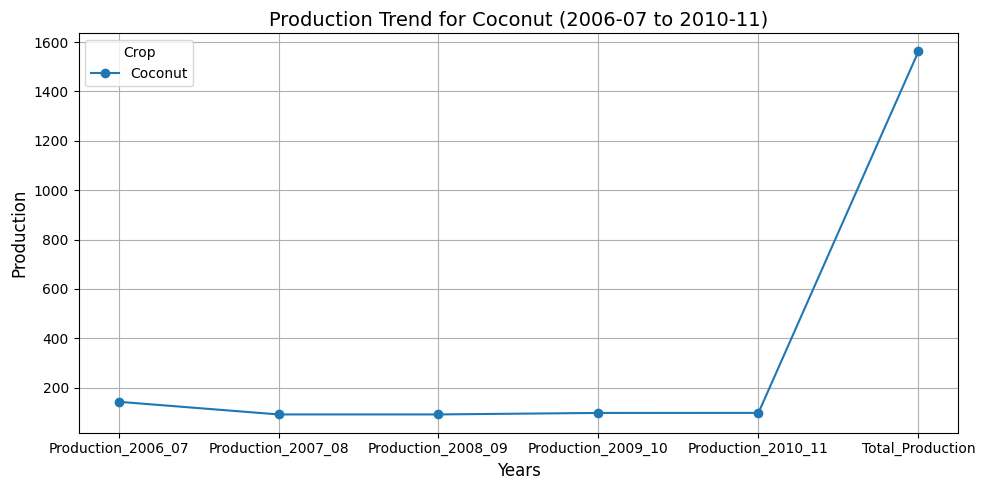

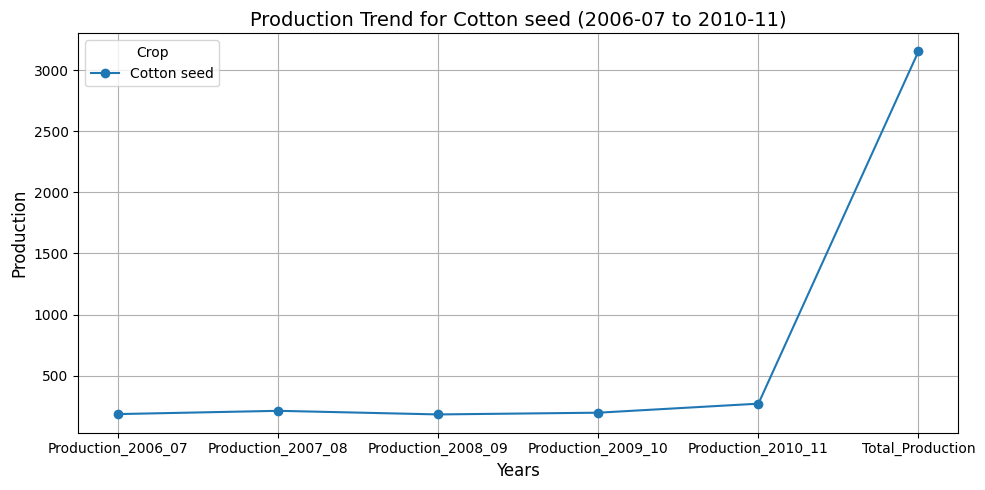

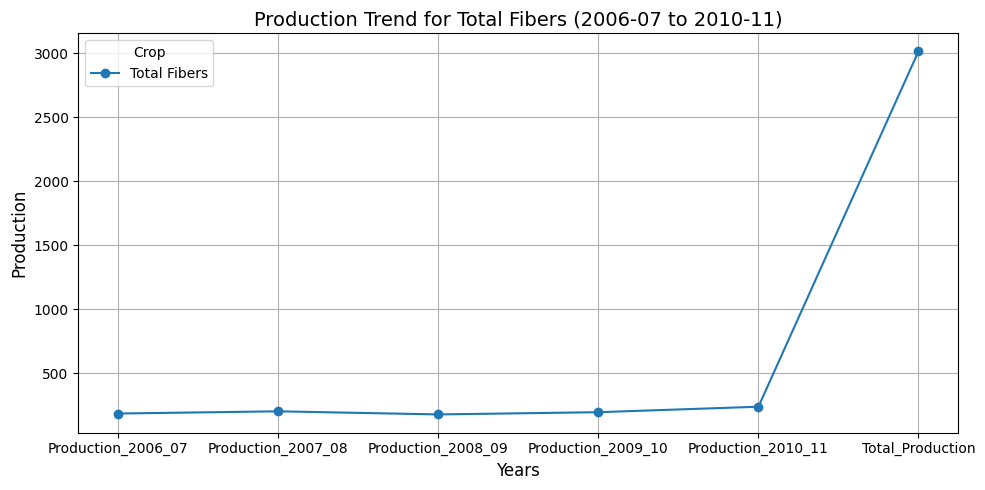

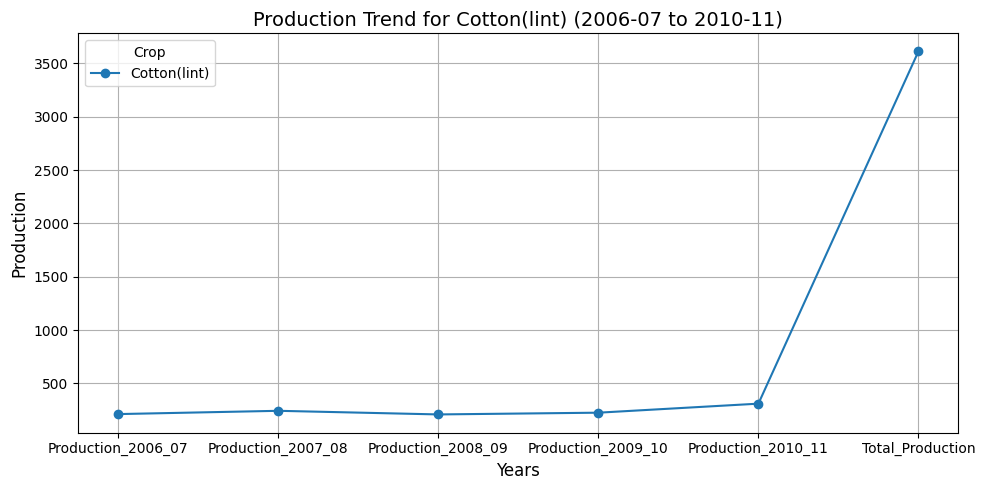

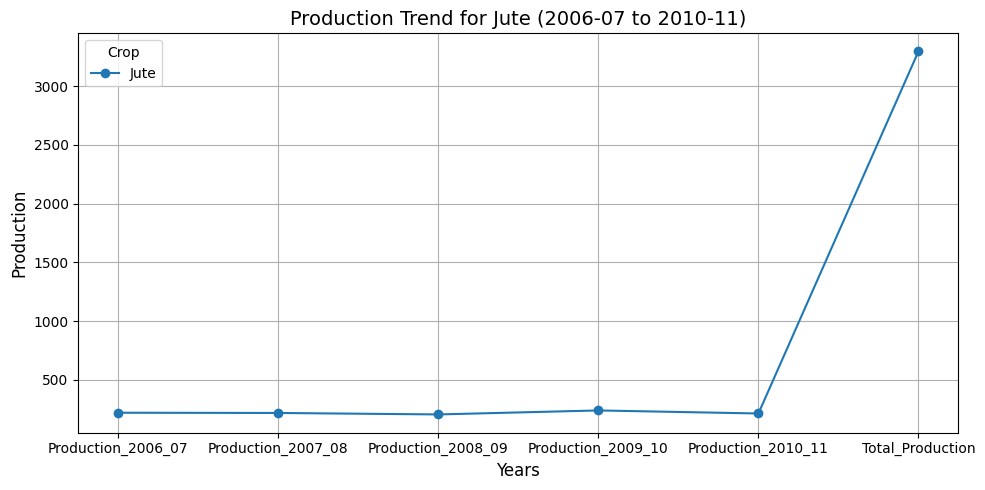

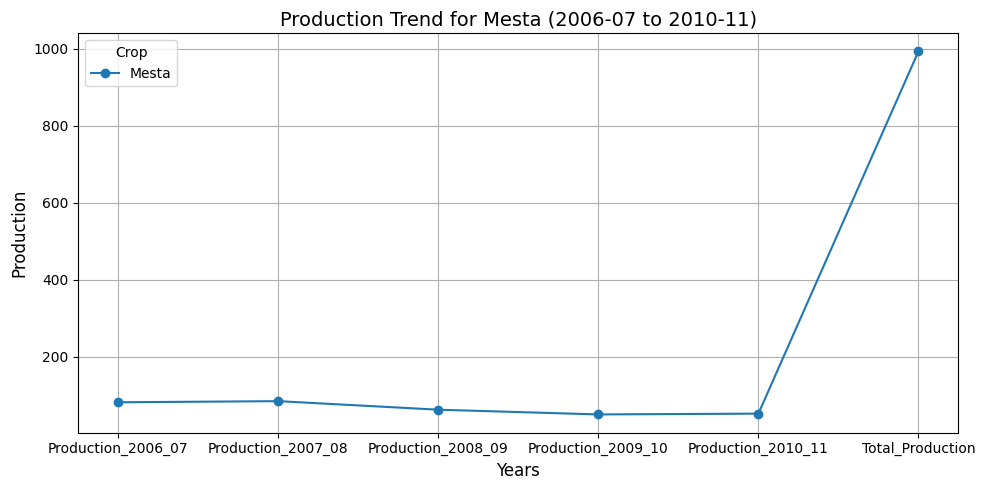

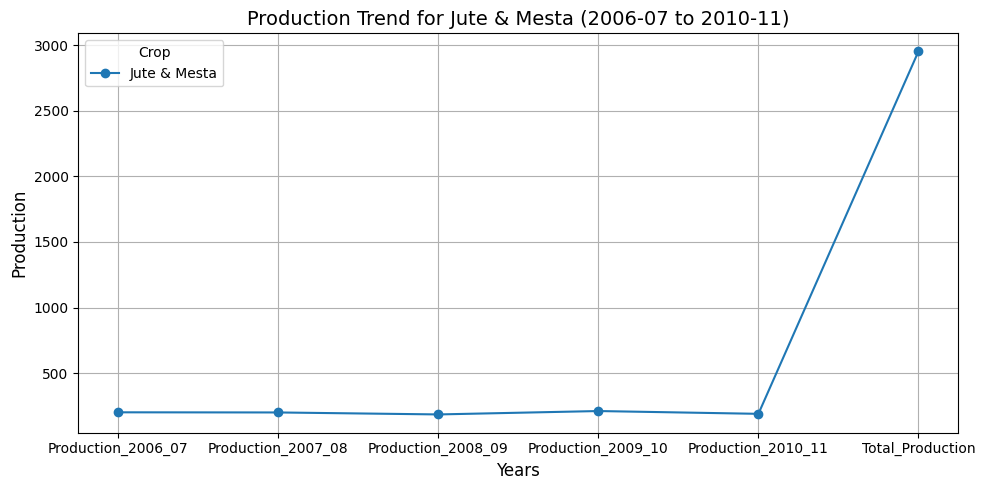

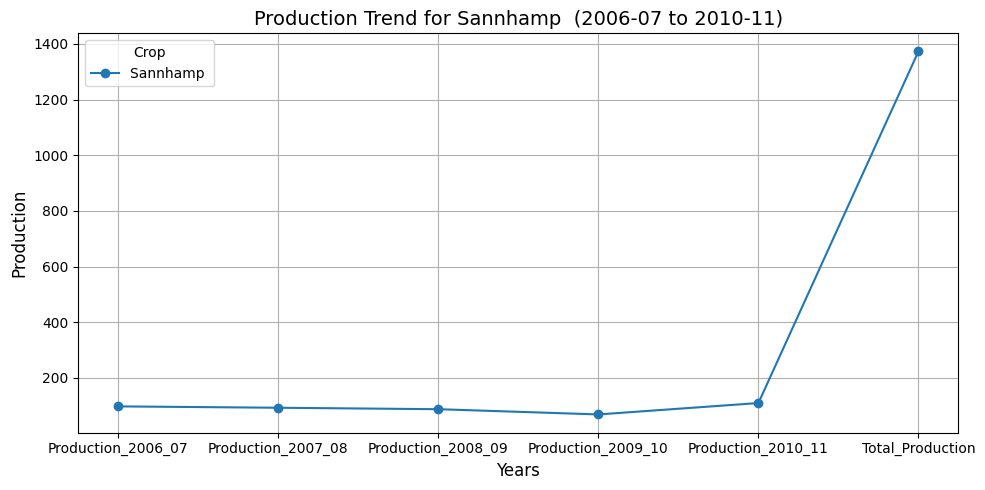

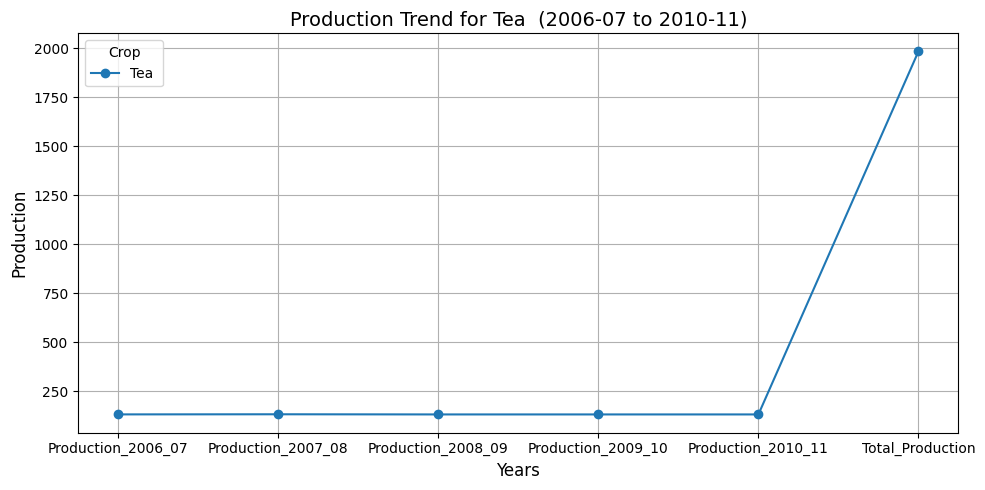

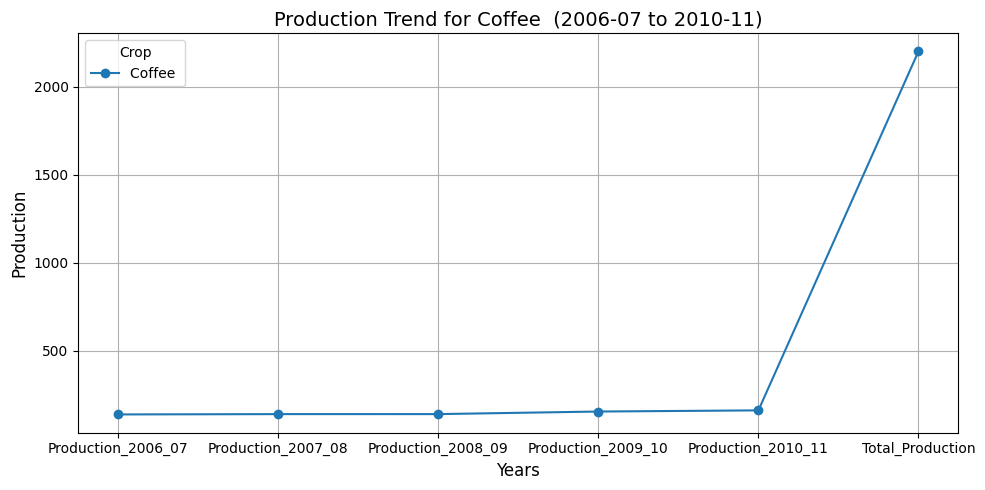

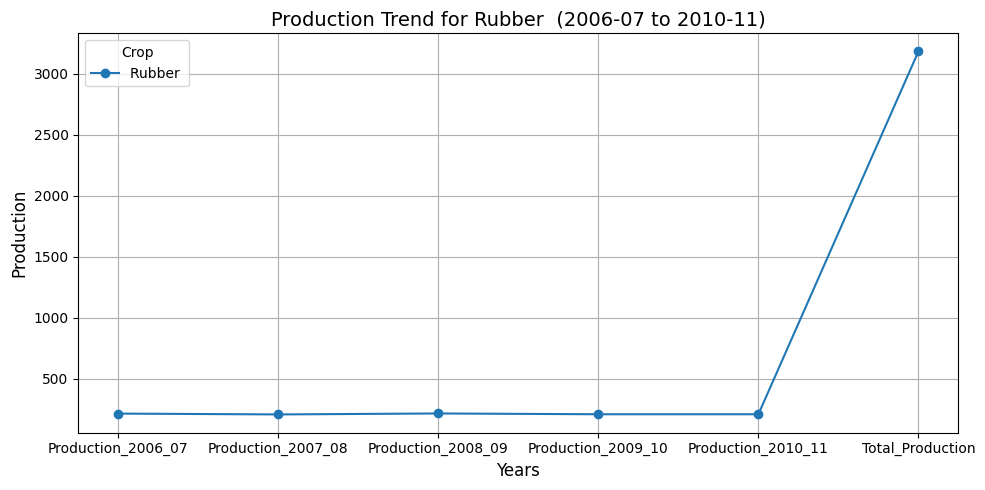

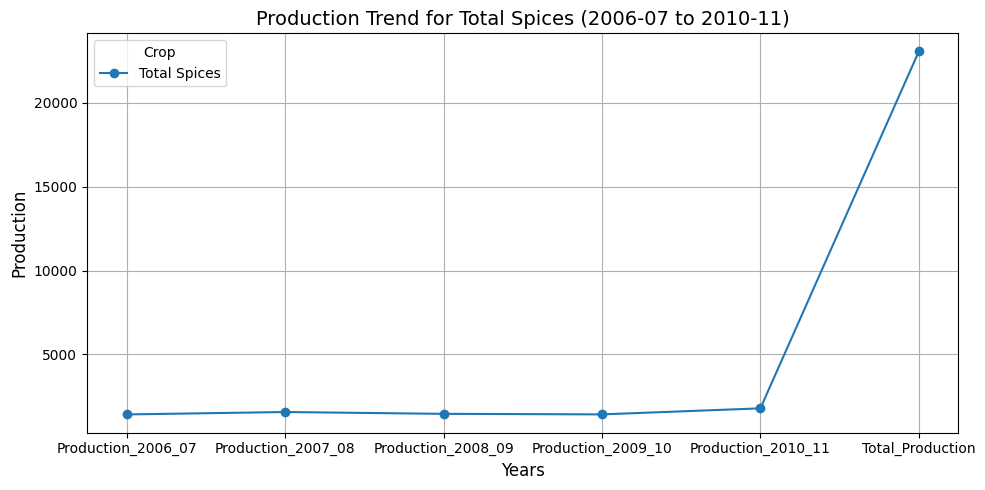

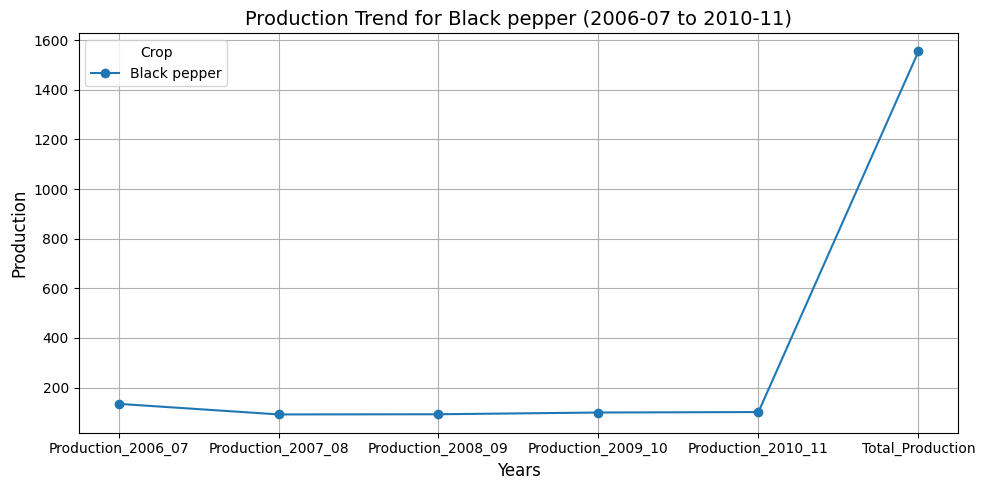

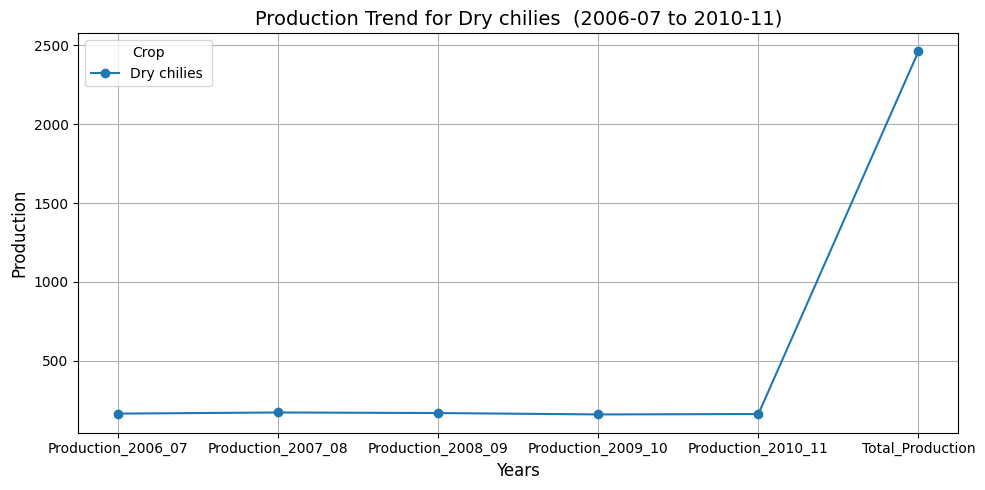

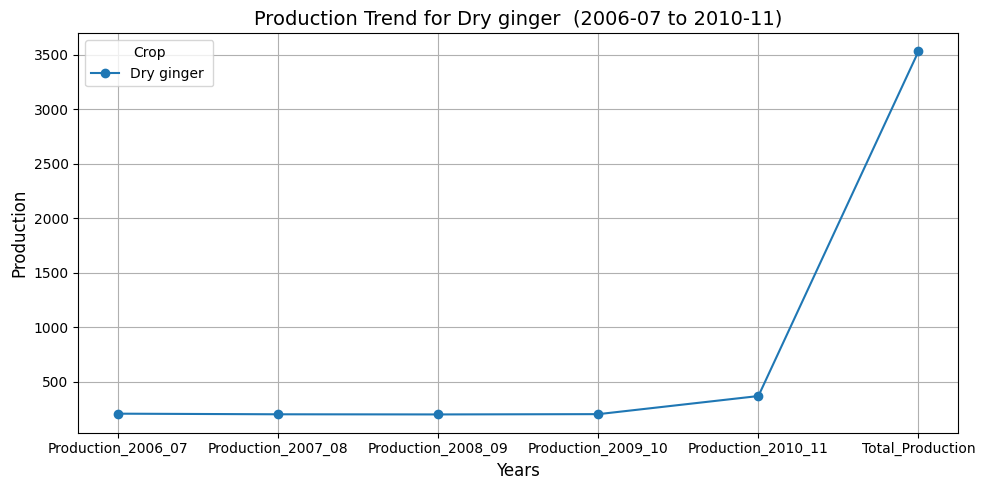

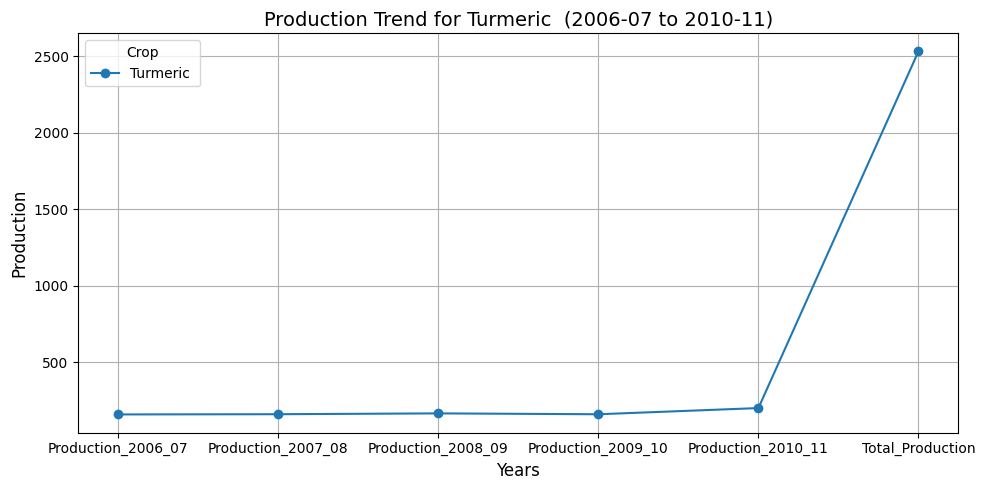

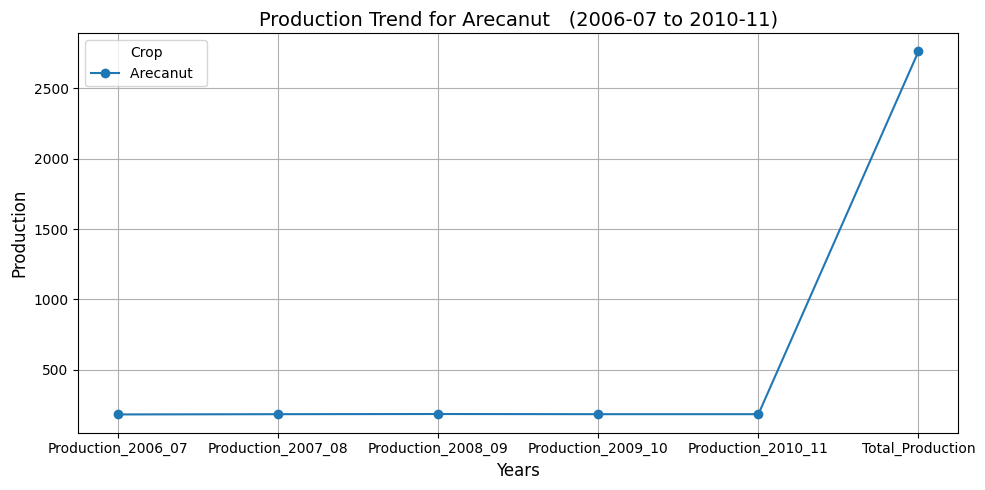

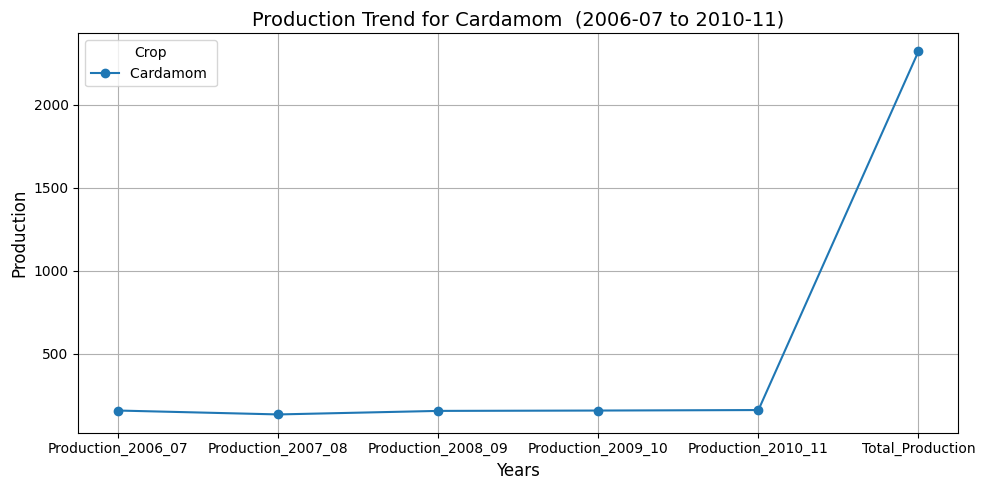

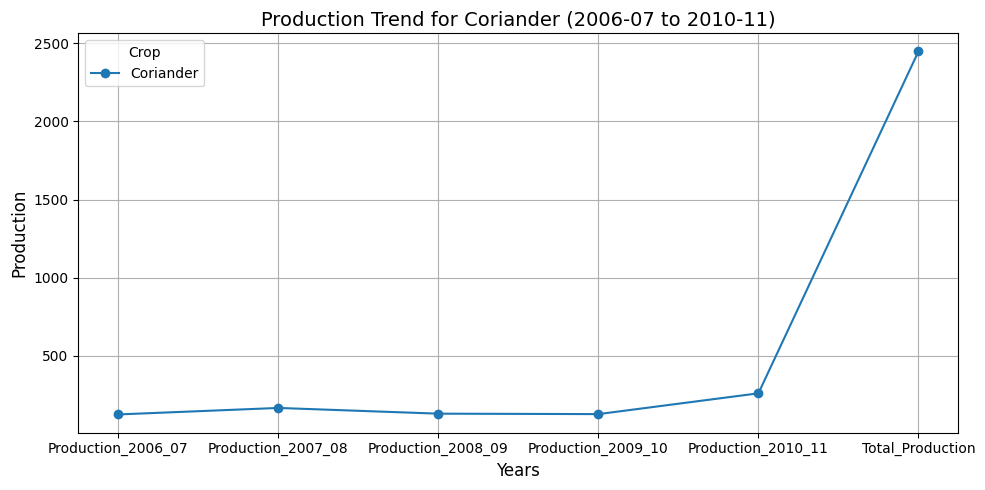

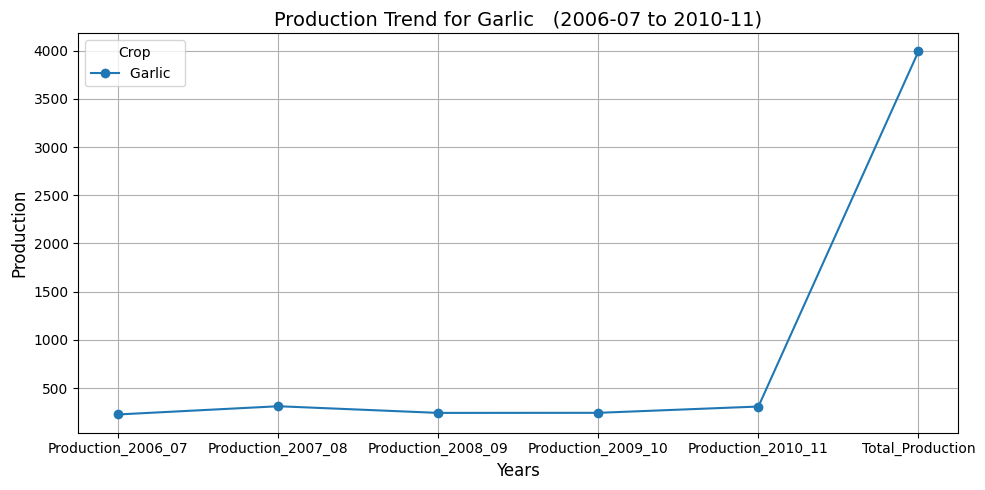

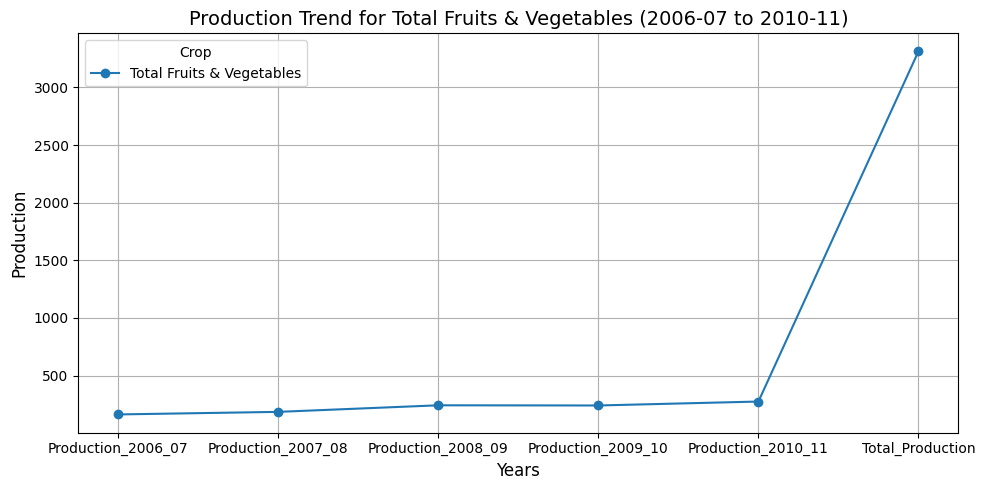

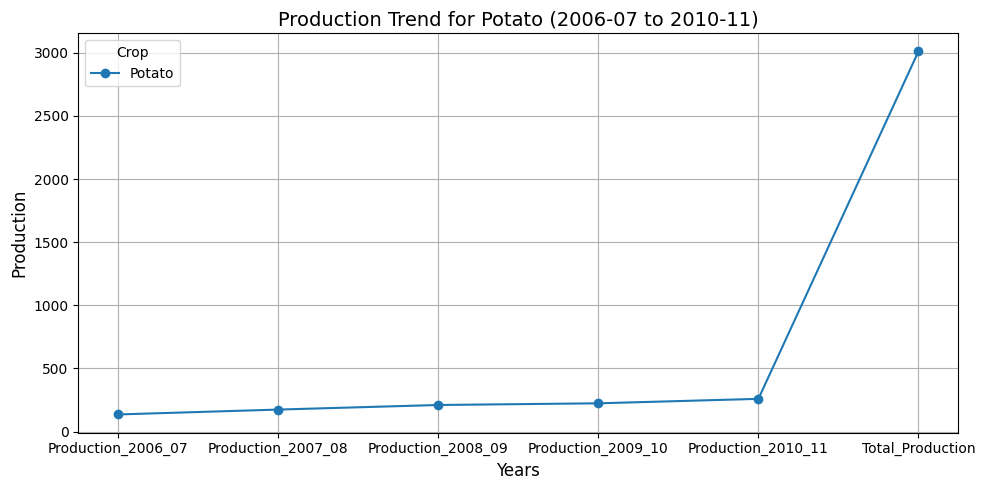

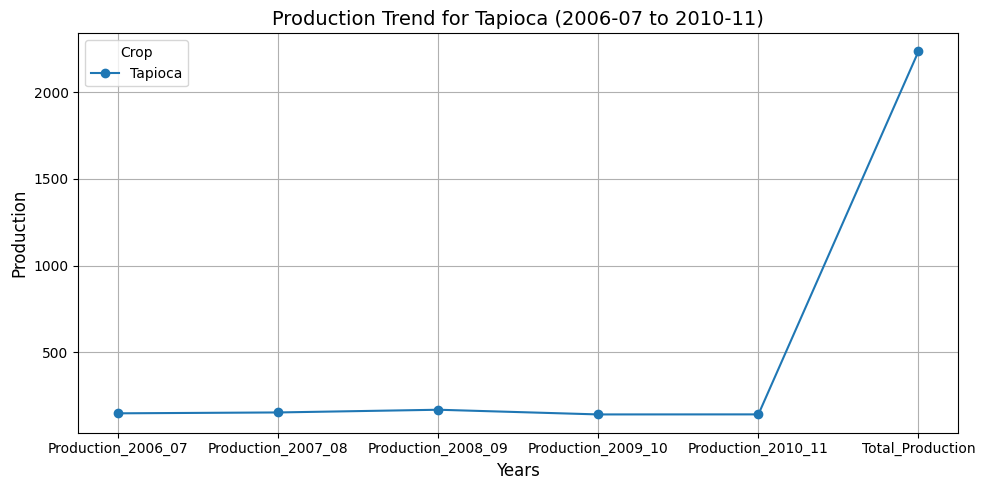

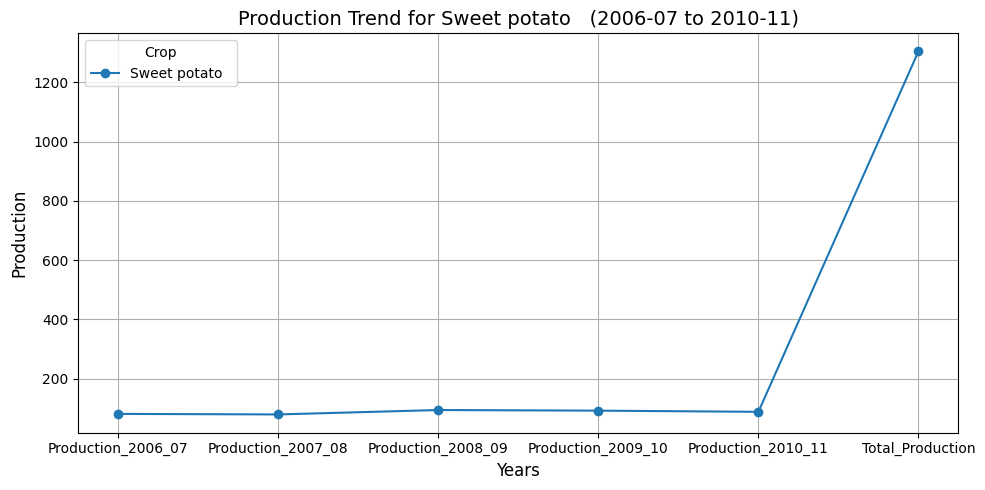

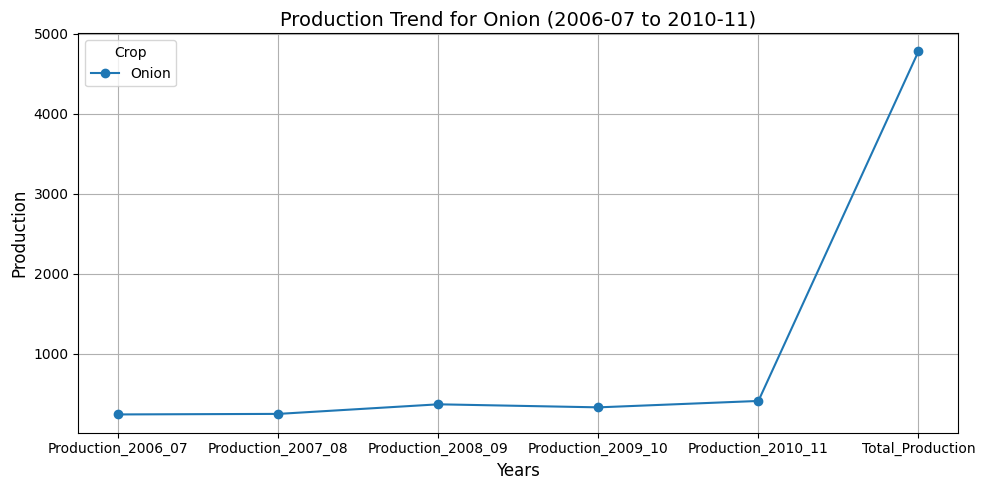

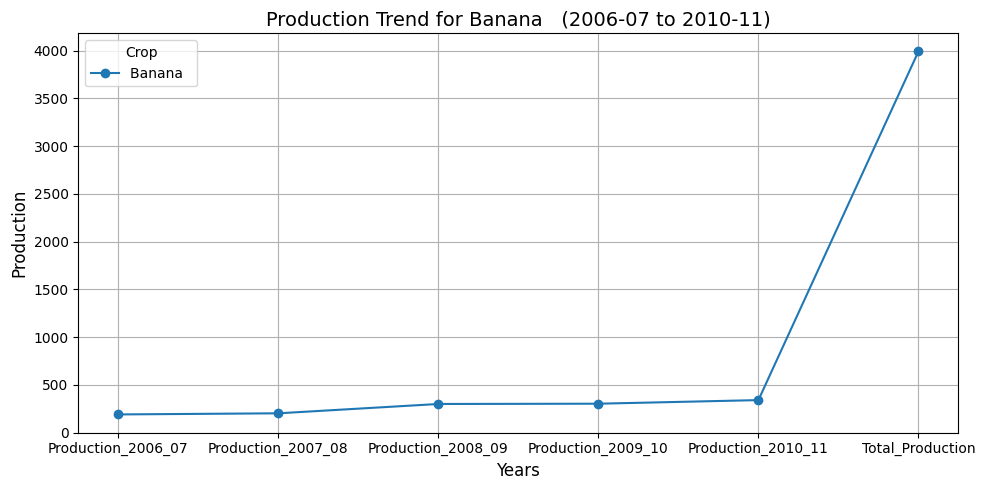

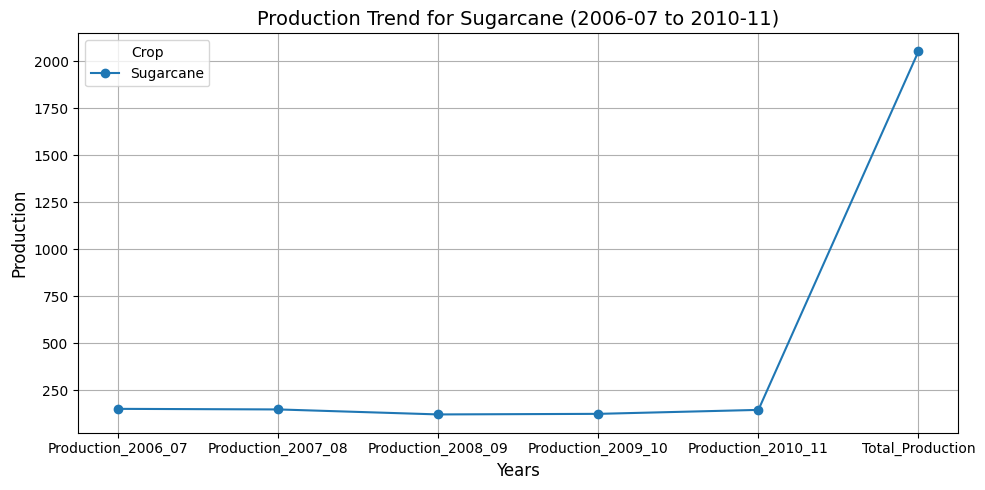

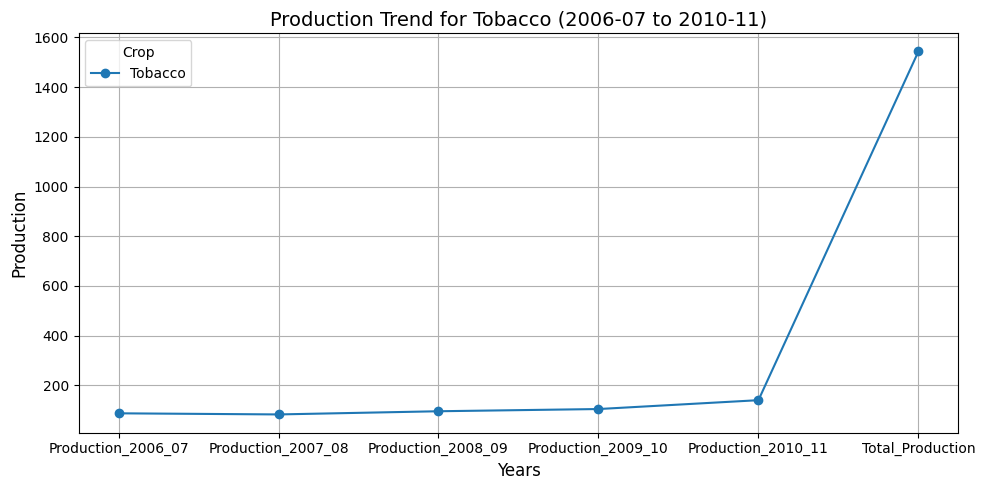

In [ ]:
# Extracting production columns (yearly production data)
production_columns = [col for col in df.columns if 'Production' in col]

# Ploting production trends for each crop in separate graphs
for crop in df['Crop'].unique():
  crop_data = df[df['Crop']==crop] [production_columns].sum()  # Suming production for the crop over the years

  #Creating a new figure for each crop
  plt.figure(figsize=(10,5))
  plt.plot(production_columns, crop_data, marker='o', label=crop)
  plt.title(f"Production Trend for {crop} (2006-07 to 2010-11)", fontsize=14)
  plt.xlabel('Years', fontsize=12)
  plt.ylabel('Production', fontsize=12)
  plt.legend(title="Crop")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

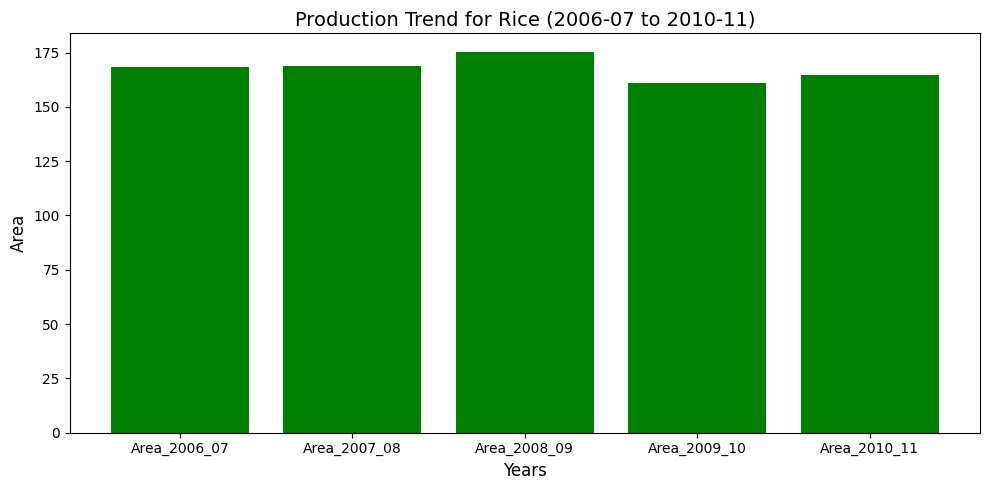

In [ ]:
# Extracting area columns (yearly area data)
area_columns = [col for col in df.columns if 'Area' in col]

rice_area = df[df['Crop'] == 'Rice'][[col for col in df.columns if 'Area' in col]].sum()

plt.figure(figsize=(10,5))
plt.bar(area_columns, rice_area,color="green")
plt.title("Production Trend for Rice (2006-07 to 2010-11)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Area', fontsize=12)
plt.tight_layout()
plt.show()

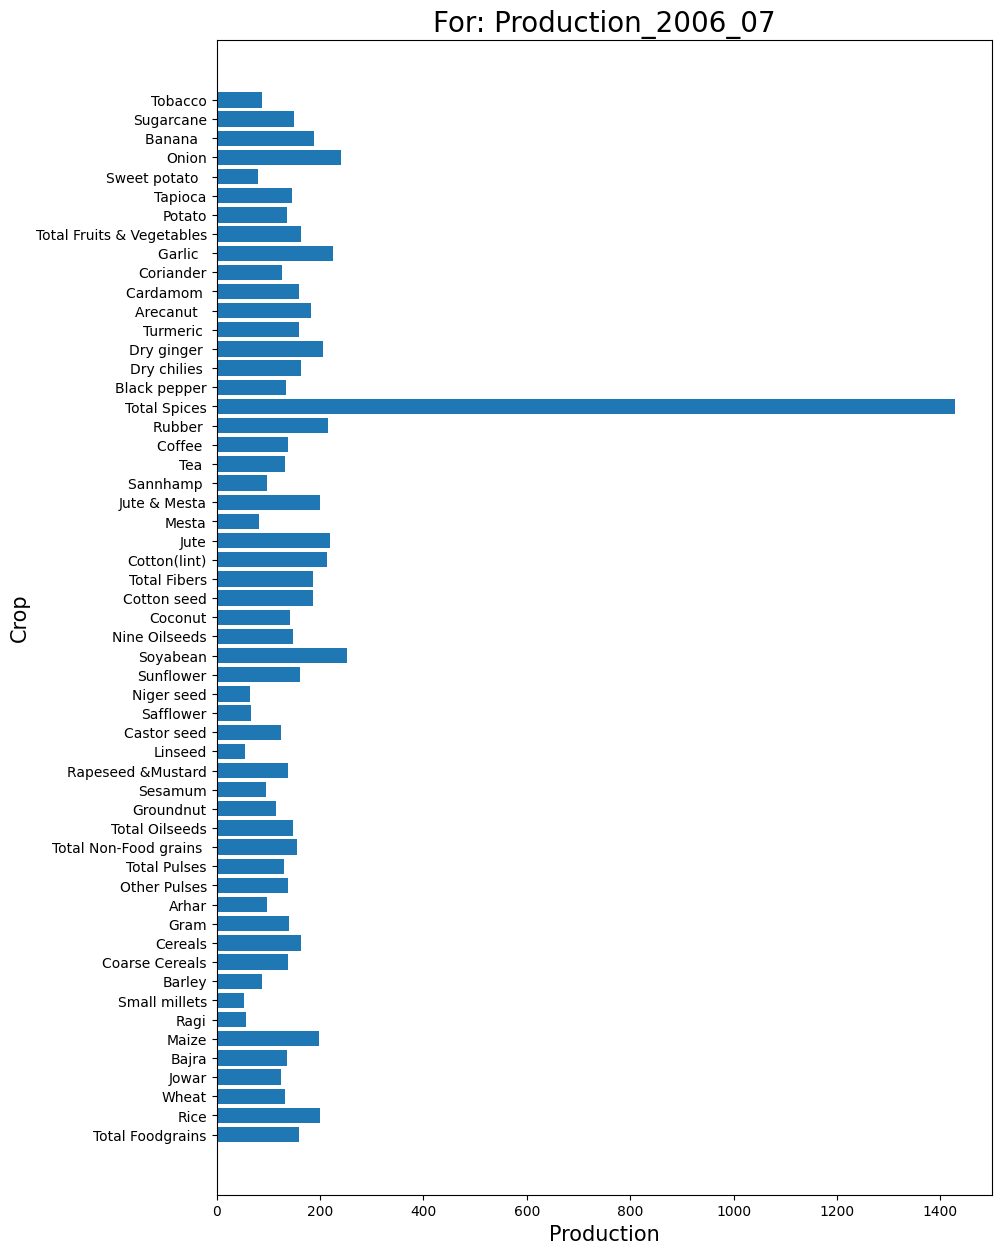

In [ ]:
year = 'Production_2006_07'
crop_labels=[]
production=[]
for crop in df['Crop'].unique():
  crop_labels.append(crop)
for i in range(55):
  production.append(df.at[i,year])
plt.figure(figsize=(10,15))
plt.barh(crop_labels,production)
plt.title(f"For: {year}",fontsize=20)
plt.xlabel("Production",fontsize=15)
plt.ylabel("Crop",fontsize=15)
plt.show()


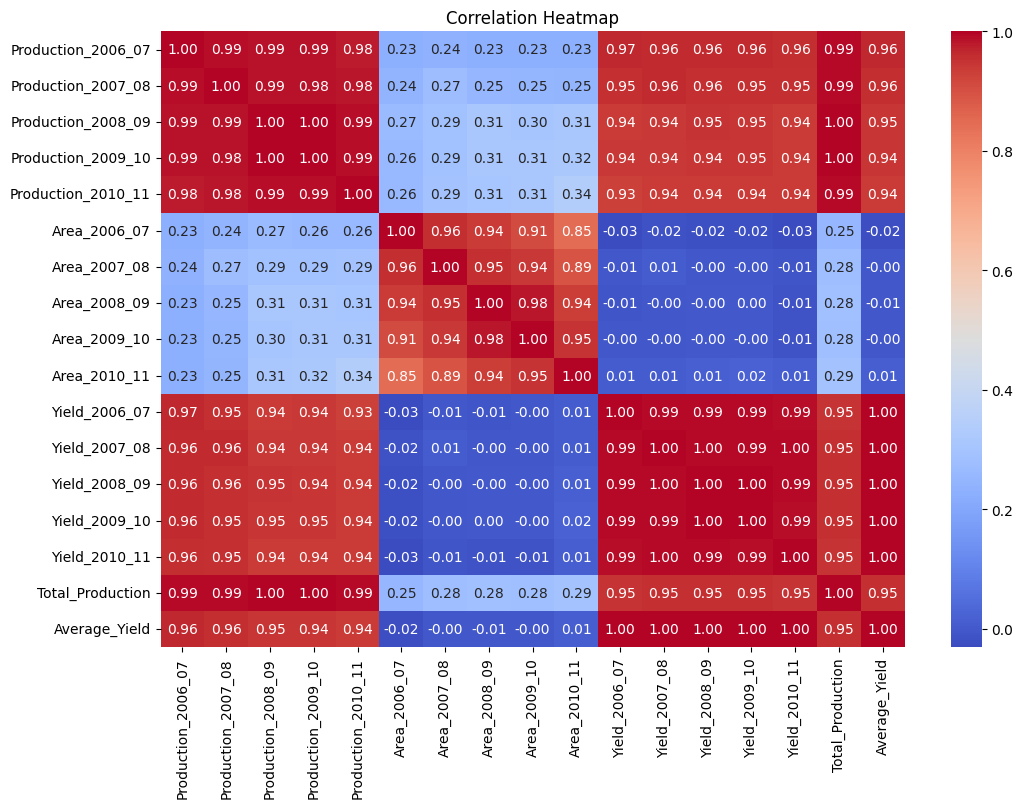

In [ ]:
area_production_yield_columns = [col for col in df.columns if any(keyword in col for keyword in ['Area', 'Production', 'Yield'])]
corr_matrix = df[area_production_yield_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Preparing the data
feature_columns = [col for col in df.columns if 'Area' in col or 'Production' in col]
target_column = 'Yield_2006_07'  # Replacing with the target year we want to predict for
X = df[feature_columns]
y = df[target_column]

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 19.76445222737179
R2 Score: 0.9790974359841744


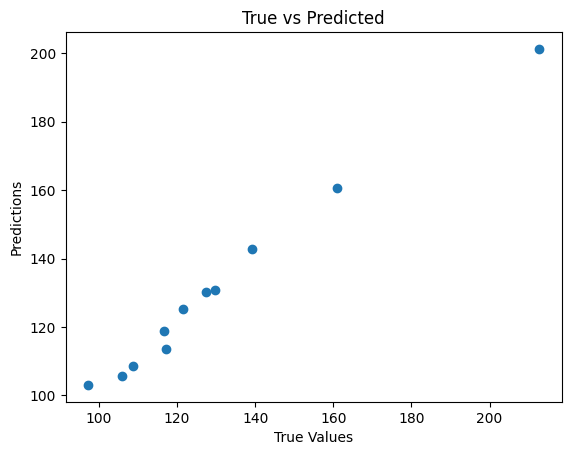

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.show()

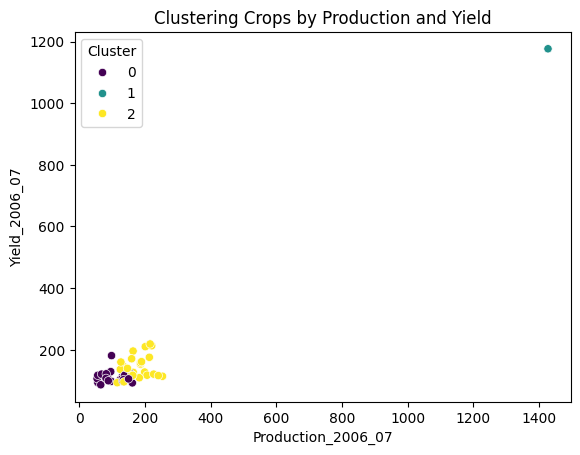

In [ ]:
# Preparing the data
trend_columns = production_columns + yield_columns
data_trends = df[trend_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_trends)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing clusters
sns.scatterplot(data=df, x='Production_2006_07', y='Yield_2006_07', hue='Cluster', palette='viridis')
plt.title('Clustering Crops by Production and Yield')
plt.show()